# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [3]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1594,7.0,0.29,0.49,3.8,0.047,37.0,136.0,0.99380,2.95,0.40,9.4,6,white
2141,7.7,0.28,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.6,5,white
3728,6.2,0.20,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,white
2858,6.9,0.33,0.26,5.0,0.027,46.0,143.0,0.99240,3.25,0.43,11.2,7,white
6029,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,red


# Exercise 6.1

Show the frecuency table of the quality by type of wine

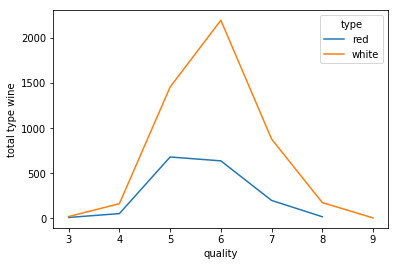

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

#sns.set()  # use Seaborn styles
data.pivot_table(values='fixed acidity', index='quality', columns='type', aggfunc='count').plot()
plt.ylabel('total type wine');


In [5]:
data.pivot_table(values='fixed acidity', index='quality',columns='type', aggfunc='count')

type,red,white
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


Como se puede observar en la grafica anterio y la tabla. donde se concentra la mayor cualidad del vino rojo y del vino blanco es el la categoria 6.

In [6]:
data['quality_bool']=data['quality'] > 6

In [7]:
datared=data[data['type']=='red']
datawhite=data[data['type']=='white']


In [8]:
datared.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_bool
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,False
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,False
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,False
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,False
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,False


In [9]:
datawhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_bool
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,False


# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


In [10]:
# Standarized the features (not the quality), this standardized with the methods Standard scaler

from sklearn.preprocessing import StandardScaler

x_red=datared[['fixed acidity', 'volatile acidity','citric acid','residual sugar',
              'chlorides','free sulfur dioxide','total sulfur dioxide','density',
              'pH','sulphates','alcohol']].values



x_white=datawhite[['fixed acidity', 'volatile acidity','citric acid','residual sugar',
              'chlorides','free sulfur dioxide','total sulfur dioxide','density',
              'pH','sulphates','alcohol']].values

ss_red = StandardScaler(with_mean=True, with_std=True)
ss_red.fit(x_red.astype(np.float))
X_red = ss_red.transform(x_red.astype(np.float))
ss_red.mean_, ss_red.scale_


ss_white = StandardScaler(with_mean=True, with_std=True)
ss_white.fit(x_white.astype(np.float))
X_white = ss_white.transform(x_white.astype(np.float))
ss_white.mean_, ss_white.scale_



(array([6.85478767e+00, 2.78241119e-01, 3.34191507e-01, 6.39141486e+00,
        4.57723561e-02, 3.53080849e+01, 1.38360657e+02, 9.94027376e-01,
        3.18826664e+00, 4.89846876e-01, 1.05142670e+01]),
 array([8.43782079e-01, 1.00784259e-01, 1.21007450e-01, 5.07153999e+00,
        2.18457377e-02, 1.70054011e+01, 4.24937260e+01, 2.99060158e-03,
        1.50985184e-01, 1.14114183e-01, 1.23049494e+00]))

In [11]:
X_red.shape

(1599, 11)

In [12]:
X_white.shape

(4898, 11)

In [13]:
y_red= pd.get_dummies(datared,columns=["quality_bool"])
y_red_target=y_red[['quality_bool_True']].values

y_white= pd.get_dummies(datawhite,columns=["quality_bool"])
y_white_target=y_white[['quality_bool_True']].values

In [14]:
from sklearn.model_selection import train_test_split

# split.
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red_target, test_size=0.3,random_state=109)
# 70% training and 30% test
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white_target, test_size=0.3,random_state=109)


In [15]:
X_red_test.shape

(480, 11)

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_red = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_red.fit(X_red_train, y_red_train)


#Predict the response for test dataset
y_red_pred = clf_red.predict(X_red_test)


In [18]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_white = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_white.fit(X_white_train, y_white_train)


#Predict the response for test dataset
y_white_pred = clf_white.predict(X_white_test)



In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_red_pred ,y_red_test))
print("Accuracy:",metrics.accuracy_score(y_white_pred,y_white_test))

Accuracy: 0.8583333333333333
Accuracy: 0.7829931972789116


# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


In [20]:
#Import svm model usen POLY
from sklearn import svm

#Create a svm Classifier
clf_red_poly = svm.SVC(kernel='poly') # Poly Kernel

#Train the model using the training sets
clf_red_poly.fit(X_red_train, y_red_train)


#Predict the response for test dataset
y_red_pred_poly  = clf_red_poly.predict(X_red_test)

In [21]:
#Import svm model usen POLY
from sklearn import svm

#Create a svm Classifier
clf_white_poly = svm.SVC(kernel='poly') # Poly Kernel

#Train the model using the training sets
clf_white_poly.fit(X_white_train, y_white_train)


#Predict the response for test dataset
y_white_pred_poly  = clf_white_poly.predict(X_white_test)

In [22]:
#Import svm model  usen RBF
from sklearn import svm

#Create a svm Classifier
clf_red_rbf  = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf_red_rbf.fit(X_red_train, y_red_train)


#Predict the response for test dataset
y_red_pred_rbf = clf_red_rbf.predict(X_red_test)

In [23]:
#Import svm model  usen RBF
from sklearn import svm

#Create a svm Classifier
clf_white_rbf  = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf_white_rbf.fit(X_white_train, y_white_train)


#Predict the response for test dataset
y_white_pred_rbf = clf_white_rbf.predict(X_white_test)

In [24]:
#Import svm model  usen RBF
from sklearn import svm

#Create a svm Classifier
clf_red_sigmoid  = svm.SVC(kernel='sigmoid') # RBF Kernel

#Train the model using the training sets
clf_red_sigmoid.fit(X_red_train, y_red_train)


#Predict the response for test dataset
y_red_pred_sigmoid = clf_red_sigmoid.predict(X_red_test)

In [25]:
#Import svm model  usen RBF
from sklearn import svm

#Create a svm Classifier
clf_white_sigmoid  = svm.SVC(kernel='sigmoid') # RBF Kernel

#Train the model using the training sets
clf_white_sigmoid.fit(X_white_train, y_white_train)


#Predict the response for test dataset
y_white_pred_sigmoid = clf_white_sigmoid.predict(X_white_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy Poly:",metrics.accuracy_score(y_red_pred_poly ,y_red_test))
print("Accuracy rbf:",metrics.accuracy_score(y_red_pred_rbf,y_red_test))
print("Accuracy Sigmoid:",metrics.accuracy_score(y_red_pred_sigmoid,y_red_test))

print("Accuracy Poly:",metrics.accuracy_score(y_white_pred_poly ,y_white_test))
print("Accuracy rbf:",metrics.accuracy_score(y_white_pred_rbf,y_white_test))
print("Accuracy Sigmoid:",metrics.accuracy_score(y_white_pred_sigmoid,y_white_test))

Accuracy Poly: 0.86875
Accuracy rbf: 0.8770833333333333
Accuracy Sigmoid: 0.8229166666666666
Accuracy Poly: 0.8020408163265306
Accuracy rbf: 0.819047619047619
Accuracy Sigmoid: 0.7224489795918367


# Exercise 6.4
Using the best SVM find the parameters that gives the best performance


'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

The best parameters are {'C': 1000, 'gamma': 0.001} with a score of 0.88


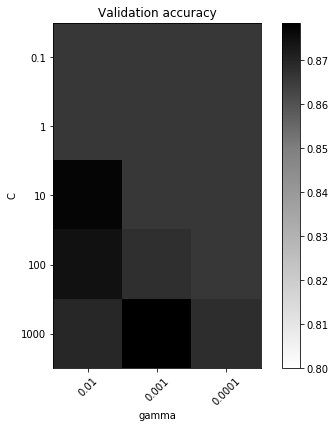

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

X = X_red_train
y = y_red_train


# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range =  [0.1, 1, 10, 100, 1000]
gamma_range = [0.01, 0.001, 0.0001]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap='gray_r',
           norm=MidpointNormalize(vmin=0.8, midpoint=0.85))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()



The best parameters are {'C': 1000, 'gamma': 0.01} with a score of 0.83


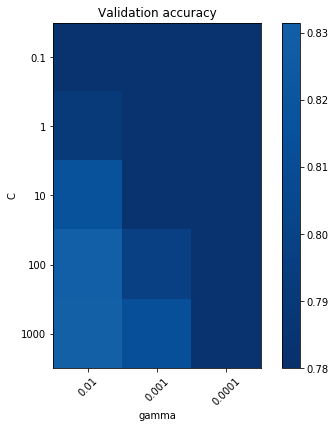

In [28]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

X = X_white_train
y = y_white_train


# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range =  [0.1, 1, 10, 100, 1000]
gamma_range = [0.01, 0.001, 0.0001]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap='Blues_r',
           norm=MidpointNormalize(vmin=0.78, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

# Exercise 6.5

Compare the results with other methods

* Logic model for wine White.

In [29]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_red = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg_red.fit(X_red_train, y_red_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

* Logic model for wine White.

In [30]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_white = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg_white.fit(X_white_train, y_white_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred_red=logreg_red.predict(X_red_test)

In [32]:
y_pred_white=logreg_white.predict(X_white_test)

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("\n")
print("Models whit wine Red")
print("Accuracy Poly:",metrics.accuracy_score(y_red_pred_poly ,y_red_test))
print("Accuracy rbf:",metrics.accuracy_score(y_red_pred_rbf,y_red_test))
print("Accuracy Sigmoid:",metrics.accuracy_score(y_red_pred_sigmoid,y_red_test))
print("Accuracy Model Logic:",metrics.accuracy_score(y_red_pred,y_red_test))

print("\n")
print("Models whit wine White")
print("Accuracy Poly:",metrics.accuracy_score(y_white_pred_poly ,y_white_test))
print("Accuracy rbf:",metrics.accuracy_score(y_white_pred_rbf,y_white_test))
print("Accuracy Sigmoid:",metrics.accuracy_score(y_white_pred_sigmoid,y_white_test))
print("Accuracy Model Logic:",metrics.accuracy_score(y_white_pred,y_white_test))



Models whit wine Red
Accuracy Poly: 0.86875
Accuracy rbf: 0.8770833333333333
Accuracy Sigmoid: 0.8229166666666666
Accuracy Model Logic: 0.8583333333333333


Models whit wine White
Accuracy Poly: 0.8020408163265306
Accuracy rbf: 0.819047619047619
Accuracy Sigmoid: 0.7224489795918367
Accuracy Model Logic: 0.7829931972789116


Como se puede observar en este caso el mejor metodo rbf para la cada modelo de vino blanco y vino rojo.

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

In [34]:
datawhite.head()
datared.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_bool
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,False
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,False
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,False
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,False
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,False


* Train a linear regression to predict wine quality (Continous)

In [35]:
y_red_target=datared[['quality']].values
y_white_target=datawhite[['quality']].values

In [36]:
from sklearn.model_selection import train_test_split

# split.
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red_target, test_size=0.3,random_state=109)
# 70% training and 30% test
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white_target, test_size=0.3,random_state=109)


Train the model wine red

In [37]:
from sklearn.linear_model import LinearRegression
linreg_red = LinearRegression()
linreg_red.fit(X_red_train, y_red_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
# examine the coefficients
print(linreg_red.coef_)

[[ 0.01737056 -0.20304306 -0.0262521   0.03794249 -0.10448874  0.07689241
  -0.1571144   0.00180962 -0.08752739  0.15939857  0.28004123]]


In [39]:
# make predictions
y_pred_red = linreg_red.predict(X_red_test)

In [40]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_red_test, y_pred_red)))

0.6543319073834599


Train the model wine white.

In [41]:
from sklearn.linear_model import LinearRegression
linreg_white = LinearRegression()
linreg_white.fit(X_white_train, y_white_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
# examine the coefficients
print(linreg_white.coef_)

[[ 0.05475717 -0.18928128  0.00928047  0.36602499 -0.00668002  0.0936553
  -0.02506105 -0.37636361  0.09896927  0.06905181  0.27308102]]


In [43]:
# make predictions
y_pred_white = linreg_white.predict(X_white_test)

In [44]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_white_test, y_pred_white)))

0.7542572489194043


# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

* Estimate a ridge regression with alpha equals 0.1 and 1  the models wine red.

In [45]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge

ridgereg_gamma_ = Ridge(alpha=0.1, normalize=True)
ridgereg_gamma_.fit(X_red_train, y_red_train)
y_pred_red_gamma_ = ridgereg_gamma_.predict(X_red_test)


ridgereg_gamma_1 = Ridge(alpha=1, normalize=True)
ridgereg_gamma_1.fit(X_red_train, y_red_train)
y_pred_red_gamma_1 = ridgereg_gamma_1.predict(X_red_test)


* Compare the coefficients with the linear regression

In [46]:
# examine the coefficients whit the gamma iqual 0.1
print(ridgereg_gamma_.coef_)

[[ 0.04606609 -0.18215677  0.00500591  0.04381393 -0.09544787  0.05523015
  -0.13275306 -0.0375161  -0.05237244  0.14785061  0.23930579]]


In [47]:
# examine the coefficients whit the gamma iqual 1
print(ridgereg_gamma_1.coef_)

[[ 0.03622946 -0.11662751  0.04838865  0.02363452 -0.05438763  0.01030429
  -0.06828811 -0.04103946 -0.01834822  0.08411945  0.14513335]]


* Evaluate the RMSE

In [48]:
# calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_red_test, y_pred_red_gamma_)))
print(np.sqrt(metrics.mean_squared_error(y_red_test, y_pred_red_gamma_1)))

0.6519527343519582
0.6732768296429634


* Estimate a ridge regression with alpha equals 0.1 and 1 the models wine white.

In [49]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge

ridgereg_gamma_white = Ridge(alpha=0.1, normalize=True)
ridgereg_gamma_white.fit(X_white_train, y_white_train)
y_pred_white_gamma_ = ridgereg_gamma_white.predict(X_white_test)


ridgereg_gamma_white_1 = Ridge(alpha=1, normalize=True)
ridgereg_gamma_white_1.fit(X_white_train, y_white_train)
y_pred_gamma_white_1 = ridgereg_gamma_white_1.predict(X_white_test)

* Compare the coefficients with the linear regression

In [50]:
# examine the coefficients whit the gamma iqual 0.1
print(ridgereg_gamma_white.coef_)

[[-0.00487607 -0.17028193  0.01191623  0.16873324 -0.03332629  0.09570493
  -0.0383299  -0.13598213  0.04802838  0.05202626  0.32209006]]


In [51]:
# examine the coefficients whit the gamma iqual 1
print(ridgereg_gamma_white_1.coef_)

[[-0.02051661 -0.08680638  0.01193706  0.03208633 -0.05290928  0.04745828
  -0.03325236 -0.07078297  0.02468722  0.02835974  0.16071   ]]


In [52]:
# calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_white_test, y_pred_white_gamma_)))
print(np.sqrt(metrics.mean_squared_error(y_white_test, y_pred_gamma_white_1)))

0.7587567757285336
0.7890051833758136


# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

* Estimate a lasso regression with alpha equals 0.01,0.1 and 1 the models wine red.

In [53]:
# select alpha 0.01 with LassoCV

from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_red_train, y_red_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
print(lassoreg.coef_)

[ 0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.03805889]


In [55]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_red_test)
print(np.sqrt(metrics.mean_squared_error(y_red_test, y_pred)))

0.7754959046127251


In [56]:
# select alpha 0.1 with LassoCV
from sklearn.linear_model import Lasso
lassoreg_alpha_ = Lasso(alpha=0.1, normalize=True)
lassoreg_alpha_.fit(X_red_train, y_red_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
print(lassoreg_alpha_.coef_)

[ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]


In [58]:
# calculate RMSE (for alpha=1)
y_red_pred_alpha = lassoreg_alpha_.predict(X_red_test)
print(np.sqrt(metrics.mean_squared_error(y_red_test, y_red_pred_alpha)))

0.7947723421675092


In [59]:
# select alpha 1 with LassoCV

from sklearn.linear_model import Lasso
lassoreg_alpha_1 = Lasso(alpha=1, normalize=True)
lassoreg_alpha_1.fit(X_red_train, y_red_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [60]:
print(lassoreg_alpha_1.coef_)

[ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]


In [61]:
# calculate RMSE (for alpha=1)
y_red_pred_alpha_1 = lassoreg_alpha_1.predict(X_red_test)
print(np.sqrt(metrics.mean_squared_error(y_red_test, y_red_pred_alpha_1)))

0.7947723421675092


* Estimate a lasso regression with alpha equals 0.01,0.1 and 1 the models wine White.

In [62]:
# select alpha 0.01 with LassoCV

from sklearn.linear_model import Lasso
lassoreg_white_alpha_ = Lasso(alpha=0.01, normalize=True)
lassoreg_white_alpha_.fit(X_white_train, y_white_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
print(lassoreg_white_alpha_.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [64]:
# calculate RMSE (for alpha=0.01)
y_pred_white = lassoreg_white_alpha_.predict(X_white_test)
print(np.sqrt(metrics.mean_squared_error(y_white_test, y_pred_white)))

0.8846258738163129


In [65]:
# select alpha 0.1 with LassoCV
from sklearn.linear_model import Lasso
lassoreg_alpha_ = Lasso(alpha=0.1, normalize=True)
lassoreg_alpha_.fit(X_white_train, y_white_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
print(lassoreg_alpha_.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [67]:
# calculate RMSE (for alpha=0.01)
y_pred_white = lassoreg_alpha_.predict(X_white_test)
print(np.sqrt(metrics.mean_squared_error(y_white_test, y_pred_white)))

0.8846258738163129


In [68]:
# select alpha 0.1 with LassoCV
from sklearn.linear_model import Lasso
lassoreg_alpha_1 = Lasso(alpha=1, normalize=True)
lassoreg_alpha_1.fit(X_white_train, y_white_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [69]:
print(lassoreg_alpha_1.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]


In [70]:
# calculate RMSE (for alpha=0.01)
y_pred_white = lassoreg_alpha_1.predict(X_white_test)
print(np.sqrt(metrics.mean_squared_error(y_white_test, y_pred_white)))

0.8846258738163129


# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

In [71]:
y_red= pd.get_dummies(datared,columns=["quality_bool"])
y_red_target=y_red[['quality_bool_True']].values

y_white= pd.get_dummies(datawhite,columns=["quality_bool"])
y_white_target=y_white[['quality_bool_True']].values



In [72]:
from sklearn.model_selection import train_test_split

# split.
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red_target, test_size=0.3,random_state=109)
# 70% training and 30% test
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white_target, test_size=0.3,random_state=109)


In [73]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_red = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg_red.fit(X_red_train, y_red_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [74]:
# examine the coefficients
print(logreg_red.coef_)

[[ 0.42032128 -0.64485504  0.02751079  0.44242441 -0.55942435  0.46147425
  -1.26982666 -0.39229325  0.02585349  0.75536668  0.76610956]]


In [75]:
# generate predicted probabilities
y_pred_prob_red = logreg_red.predict_proba(X_red_test)

In [76]:
# calculate log loss
print(metrics.log_loss(y_red_test, y_pred_prob_red))

0.3307778082389001


In [77]:
y_pred_red=logreg_red.predict(X_red_test)


In [78]:
from sklearn.metrics import f1_score

print(f1_score(y_red_test,y_pred_red))

0.4220183486238533


* Train a logistic regression to predict wine quality (binary), variable White.

In [79]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_white = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg_white.fit(X_white_train, y_white_train)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [80]:
# examine the coefficients
print(logreg_white.coef_)

[[ 0.41454243 -0.38957237 -0.09268664  1.2899411  -0.24718353  0.18333507
  -0.0449817  -1.63192967  0.45869951  0.22965399  0.3565719 ]]


In [81]:
# generate predicted probabilities
y_pred_prob_white = logreg_white.predict_proba(X_white_test)

In [82]:
# calculate log loss
print(metrics.log_loss(y_white_test, y_pred_prob_white))

0.4257721959218283


In [83]:
y_pred_white=logreg_white.predict(X_white_test)

In [84]:
from sklearn.metrics import f1_score

print(f1_score(y_white_test,y_pred_white))

0.37606837606837606


# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score



Logistic, C=1 , penalty=L1:
	Brier: 0.095
	Precision: 0.575
	Recall: 0.338
	F1: 0.426

	coefficients:
 [[ 0.35620347 -0.64491464  0.01392056  0.39351251 -0.50685909  0.39299564
  -1.14047028 -0.32299613  0.          0.71207697  0.77399407]]


Logistic, C=0.1 , penalty=L1:
	Brier: 0.093
	Precision: 0.581
	Recall: 0.265
	F1: 0.364

	coefficients:
 [[ 0.28483163 -0.44746713  0.10778565  0.27660644 -0.32384732  0.15083674
  -0.5870576  -0.31592694  0.00639679  0.50756202  0.5807523 ]]


Logistic, C=0.01 , penalty=L1:
	Brier: 0.116
	Precision: 0.000
	Recall: 0.000
	F1: 0.000

	coefficients:
 [[ 0.         -0.02440025  0.          0.          0.          0.
   0.          0.          0.          0.          0.22132142]]


Logistic, C=1 , penalty=L2:
	Brier: 0.095
	Precision: 0.561
	Recall: 0.338
	F1: 0.422

	coefficients:
 [[ 0.4024385  -0.60657181  0.04489357  0.41162355 -0.50821956  0.38461533
  -1.10522623 -0.38797404  0.02698453  0.70742281  0.72593433]]


Logistic, C=0.1 , penalty=L2:

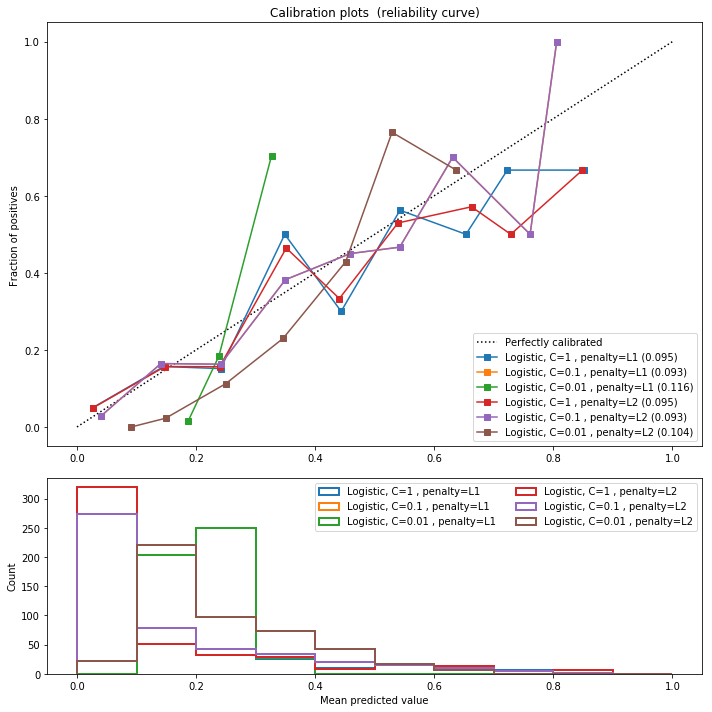

In [85]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


# Create dataset of classification task with many redundant and few
# informative features

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    lr_C_P1 = LogisticRegression(C=0.01,penalty='l1',  solver='liblinear',multi_class='auto')

    # Calibrated with sigmoid calibration
    lr_C_1_p1 = LogisticRegression(C=0.1,penalty='l1',  solver='liblinear',multi_class='auto')

    # Logistic regression with no calibration as baseline
    lr_p1 = LogisticRegression(C=1.,penalty='l1',  solver='liblinear',multi_class='auto')

    # Calibrated with isotonic calibration
    lr_C_pl2 = LogisticRegression(C=0.01,penalty='l2', solver='liblinear',multi_class='auto') 

    # Calibrated with sigmoid calibration
    lr_C_1_p1 = LogisticRegression(C=0.1,penalty='l2', solver='liblinear',multi_class='auto')

    # Logistic regression with no calibration as baseline
    lr_pl2 = LogisticRegression(C=1,penalty='l2', solver='liblinear',multi_class='auto')    
    
    
    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr_p1,'Logistic, C=1 , penalty=L1'),
                      (lr_C_1_p1,'Logistic, C=0.1 , penalty=L1'),
                      (lr_C_P1, 'Logistic, C=0.01 , penalty=L1'),
                      (lr_pl2, 'Logistic, C=1 , penalty=L2'),
                      (lr_C_1_p1,  'Logistic, C=0.1 , penalty=L2'),
                      (lr_C_pl2, 'Logistic, C=0.01 , penalty=L2'),]:
        clf.fit(X_red_train, y_red_train)
        y_pred = clf.predict(X_red_test)
        
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_red_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_red_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_red_test, prob_pos, pos_label=y.max())
        print("\n")
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_red_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_red_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_red_test, y_pred))
        print("\tcoefficients:\n" , clf.coef_)
        
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_red_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper right", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)




plt.show()



Logistic, C=1 , penalty=L1:
	Brier: 0.137
	Precision: 0.591
	Recall: 0.276
	F1: 0.376

	coefficients:
 [[ 0.37473191 -0.38429651 -0.08810347  1.1866402  -0.24715141  0.18245513
  -0.04894821 -1.47570437  0.42758338  0.21936041  0.42063988]]


Logistic, C=0.1 , penalty=L1:
	Brier: 0.138
	Precision: 0.582
	Recall: 0.257
	F1: 0.357

	coefficients:
 [[ 0.20645006 -0.35511825 -0.08432126  0.68729818 -0.26445538  0.20551277
  -0.10048744 -0.72093529  0.2908731   0.17657334  0.71203802]]


Logistic, C=0.01 , penalty=L1:
	Brier: 0.146
	Precision: 0.538
	Recall: 0.132
	F1: 0.212

	coefficients:
 [[ 0.         -0.07884891  0.          0.          0.          0.
   0.          0.          0.          0.          0.72174425]]


Logistic, C=1 , penalty=L2:
	Brier: 0.137
	Precision: 0.603
	Recall: 0.276
	F1: 0.378

	coefficients:
 [[ 0.36566337 -0.3857137  -0.09242186  1.14773024 -0.25463895  0.19030743
  -0.05939468 -1.40878541  0.42005975  0.21770485  0.4516811 ]]


Logistic, C=0.1 , penalty=L2:

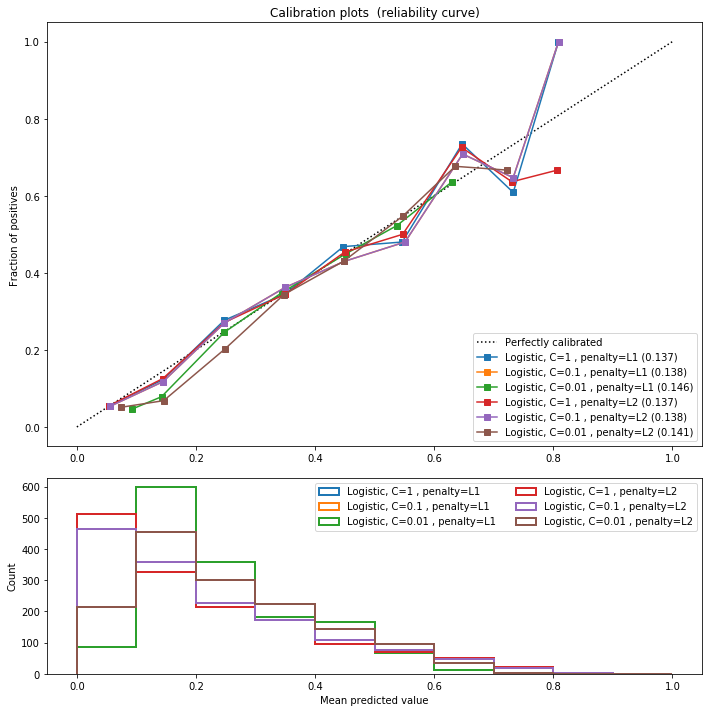

In [86]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


# Create dataset of classification task with many redundant and few
# informative features

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    lr_C_P1 = LogisticRegression(C=0.01,penalty='l1',  solver='liblinear',multi_class='auto')

    # Calibrated with sigmoid calibration
    lr_C_1_p1 = LogisticRegression(C=0.1,penalty='l1',  solver='liblinear',multi_class='auto')

    # Logistic regression with no calibration as baseline
    lr_p1 = LogisticRegression(C=1.,penalty='l1',  solver='liblinear',multi_class='auto')

    # Calibrated with isotonic calibration
    lr_C_pl2 = LogisticRegression(C=0.01,penalty='l2', solver='liblinear',multi_class='auto') 

    # Calibrated with sigmoid calibration
    lr_C_1_p1 = LogisticRegression(C=0.1,penalty='l2', solver='liblinear',multi_class='auto')

    # Logistic regression with no calibration as baseline
    lr_pl2 = LogisticRegression(C=1,penalty='l2', solver='liblinear',multi_class='auto')    
    
    
    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr_p1,'Logistic, C=1 , penalty=L1'),
                      (lr_C_1_p1,'Logistic, C=0.1 , penalty=L1'),
                      (lr_C_P1, 'Logistic, C=0.01 , penalty=L1'),
                      (lr_pl2, 'Logistic, C=1 , penalty=L2'),
                      (lr_C_1_p1,  'Logistic, C=0.1 , penalty=L2'),
                      (lr_C_pl2, 'Logistic, C=0.01 , penalty=L2'),]:
        clf.fit(X_white_train, y_white_train)
        y_pred_white = clf.predict(X_white_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_white_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_white_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_white_test, prob_pos, pos_label=y.max())
        print("\n")
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_white_test, y_pred_white))
        print("\tRecall: %1.3f" % recall_score(y_white_test, y_pred_white))
        print("\tF1: %1.3f\n" % f1_score(y_white_test, y_pred_white))
        print("\tcoefficients:\n" , clf.coef_)
        
        
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_white_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper right", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)


plt.show()